In [2]:
import os
import numpy as np
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
def apply_sobel_filter(image, target_size=(256, 256)):
    try:
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=5)
        sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=5)
        sobel = cv2.magnitude(sobelx, sobely)
        sobel_resized = cv2.resize(sobel, target_size)
        return sobel_resized
    except Exception as e:
        print(f"Error applying Sobel filter: {e}")
        return None

In [95]:
def preprocess_image(image, target_size=(256, 256)):
    sobel_image = apply_sobel_filter(image, target_size)
    
    # Normalize the data
    sobel_image = sobel_image / 255.0

    # Expand dimensions to include color channel
    sobel_image = np.expand_dims(sobel_image, axis=-1)
    sobel_image = np.expand_dims(sobel_image, axis=0)

    return sobel_image

In [5]:
def predict_image(model, image):
    # Preprocessar imagem
    processed_image = preprocess_image(image)
    
    # Realizar previsão
    prediction = model.predict(processed_image)
    
    # Converter previsão para rótulo
    predicted_label = int(np.round(prediction[0][0]))
    
    return predicted_label

In [6]:
model1 = tf.keras.models.load_model('Model/meu_modelo_Sobel_Efficientnet_Model.h5')


In [7]:
model2 = tf.keras.models.load_model('Model/meu_modelo_sobel.h5')

In [14]:
def extract_frames_from_video(video_path, frame_count=10):
    """
    Extrai um número específico de frames de um vídeo.
    
    :param video_path: Caminho para o vídeo.
    :param frame_count: Número de frames a serem extraídos.
    :return: Lista de frames extraídos.
    """
    cap = cv2.VideoCapture(video_path)
    frames = []
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    step = max(total_frames // frame_count, 1)

    for i in range(0, total_frames, step):
        cap.set(cv2.CAP_PROP_POS_FRAMES, i)
        ret, frame = cap.read()
        if ret:
            frames.append(frame)
    
    cap.release()
    return frames

In [15]:
def load_video_dataset(data_dir, frame_count=5):
    """
    Carrega o conjunto de dados de vídeos, extrai frames e atribui rótulos.
    
    :param data_dir: Diretório raiz contendo as subpastas dos vídeos.
    :param frame_count: Número de frames a serem extraídos de cada vídeo.
    :return: Arrays de dados e rótulos.
    """
    X, y = [], []
    class_labels = {'YouTube-real': 0, 'Celeb-synthesis': 1, 'Celeb-real': 0}
    
    for label, value in class_labels.items():
        subdir = os.path.join(data_dir, label)
        for file in os.listdir(subdir):
            if file.endswith('.mp4'):  # Supondo que os vídeos são arquivos .mp4
                video_path = os.path.join(subdir, file)
                frames = extract_frames_from_video(video_path, frame_count=frame_count)
                for frame in frames:
                    X.append(frame)
                    y.append(value)
    
    return X, y

In [17]:
data_dir = '../Celeb-DF'
X, y = load_video_dataset(data_dir)

Rótulo: Real


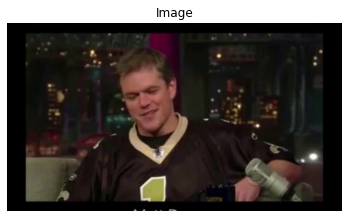

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
Rótulo previsto modelo_Sobel_Efficientnet: Real
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Rótulo previsto modelo_sobel: Real


In [20]:
num = 5
image = X[num]

label_mapping = {0: "Real", 1: "Falso"}
print(f"Rótulo: {label_mapping[y[num]]}")

if image.shape[-1] == 1:
    image = image.squeeze(-1)

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Image')
plt.axis('off')  # Hide the axes
plt.show()

predicted_class = predict_image(model1, image)
label_mapping = {0: "Real", 1: "Falso"}
print(f"Rótulo previsto modelo_Sobel_Efficientnet: {label_mapping[predicted_class]}")

predicted_class = predict_image(model2, image)
label_mapping = {0: "Real", 1: "Falso"}
print(f"Rótulo previsto modelo_sobel: {label_mapping[predicted_class]}")

In [8]:
images_path = ['../Imgs/imgReal.png', '../Imgs/imgFake.png', '../Imgs/imgReal2.png', '../Imgs/imgFake2.png']

In [ ]:
for image_path in images_path:
    image = cv2.imread(image_path)
    label_mapping = {0: "Real", 1: "Falso"}

    predicted_class = predict_image(model1, image)
    print(f"Rótulo previsto modelo_Sobel_Efficientnet: {label_mapping[predicted_class]}")

    predicted_class = predict_image(model2, image)
    print(f"Rótulo previsto modelo_Sobel: {label_mapping[predicted_class]}\n")
    